# Exploratory Data Analysis for the RICKD data bundle

## Objectives of the Analysis:
The primary goal of this analysis is to explore the 3D pose data of subjects who participated in at least one running session. Using the provided metadata and pose information, we aim to address the following questions:

- Can we identify pose-related characteristics that indicate a runner is injured?
- Can we determine specific types of injuries based on pose data?
- Is it possible to categorize runners based on their pose? What characteristics are relevant for grouping, and can we interpret the meaning of these groups?
- Can insights from this dataset be generalized and applied to a new dataset?

## Running Injury Clinic Kinematic Dataset (RICKD)
This dataset contains a collection of 3D pose data from subjects who participated in running and walking sessions. The dataset was published in a [Nature article](https://www.nature.com/articles/s41597-024-04011-7) and is designed to facilitate research in biomechanics, particularly in understanding running injuries.

### Folder Structure
The dataset is organized into a structured folder hierarchy and contains various types of files. Below is a detailed summary:

- **`Running Injury Clinic Kinematic Dataset/`**: The main folder containing all dataset files.
  - **`run_data_meta.csv`**: Metadata for running sessions.
  - **`walk_data_meta.csv`**: Metadata for walking sessions.
  - **`ric_data.zip`**: Compressed folder containing raw data files.
  - **`backup/`**: Backup of the dataset in a `.zip` format.
  - **`reformat_data/`**: Contains subfolders for each subject, named by their unique ID (e.g., `100001`, `100002`, etc.). Each folder includes raw `.json` files with kinematic data.
  - **`Supplemental_materials/`**: Additional resources and documentation.

### File Types and Features
- **Raw Data (`.json` files)**:
  - Located in the `reformat_data/` subfolders.
  - There is one folder per subject, with each folder containing multiple `.json` files corresponding to a different running or walking session.
  - Each `.json` file contains:
    - 3D coordinates of markers (e.g., hip, knee, ankle).
    - Time series data for each marker.
    - Metadata about the session (e.g., speed, surface type).

- **Metadata (`.csv` files)**:
  - Found in the root folder.
  - Provides demographic and injury-related information, such as:
    - Subject ID
    - Age, gender, height, and weight
    - Injury type, duration, and affected joints
    - Running history and athletic level


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from core.constants import RICKD_RUNNING_METADATA_FILE

In [2]:
run_data_meta = pd.read_csv(RICKD_RUNNING_METADATA_FILE)
run_data_meta.head()

,sub_id,datestring,filename,speed_r,age,Height,Weight,Gender,DominantLeg,InjDefn,...,SpecInjury2,Activities,Level,YrsRunning,RaceDistance,RaceTimeHrs,RaceTimeMins,RaceTimeSecs,YrPR,NumRaces
0,100433,2010-10-05 13:22:40,20101005T132240.json,1.610861,53,NaN,NaN,Unknown,NaN,Training volume/intensity affected,...,NaN,"walking, horseback riding, strength training",Recreational,13.0,10k,NaN,NaN,NaN,NaN,NaN
1,100434,2010-11-17 13:22:40,20101117T132240.json,2.237294,51,NaN,NaN,Female,NaN,Training volume/intensity affected,...,NaN,"running, swimming",Recreational,20.0,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN
2,100537,2012-07-03 10:25:50,20120703T102550.json,2.127441,255,173.1,67.6,Female,Right,2 workouts missed in a row,...,NaN,"hiking, power walking, pilates",Recreational,2.0,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN
3,100560,2012-07-17 10:37:48,20120717T103748.json,2.657365,33,179.3,83.0,Female,Right,No injury,...,NaN,Yoga,Recreational,NaN,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN
4,101481,2012-07-17 10:50:21,20120717T105021.json,2.625088,32,176.3,58.6,Female,NaN,No injury,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
num_rows = run_data_meta.shape[0]
num_cols = run_data_meta.shape[1]
print(f"Number of rows before data cleaning: {num_rows}")
print(f"Number of columns before data cleaning: {num_cols}")
print("\nColumn Information:")
print(run_data_meta.info())

Number of rows before data cleaning: 1832
Number of columns before data cleaning: 26

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sub_id        1832 non-null   int64  
 1   datestring    1832 non-null   object 
 2   filename      1832 non-null   object 
 3   speed_r       1832 non-null   float64
 4   age           1832 non-null   int64  
 5   Height        1829 non-null   float64
 6   Weight        1830 non-null   float64
 7   Gender        1832 non-null   object 
 8   DominantLeg   1480 non-null   object 
 9   InjDefn       1752 non-null   object 
 10  InjJoint      1598 non-null   object 
 11  InjSide       1346 non-null   object 
 12  SpecInjury    1243 non-null   object 
 13  InjDuration   405 non-null    float64
 14  InjJoint2     836 non-null    object 
 15  InjSide2      822 non-null    object 
 16  SpecInju

### Column definitions:

#### Demographics
- `sub_id`: Subject identification number
- `age`: Subject age in years at time of collection
- `Height`: Subject height (cm) measured at time of collection
- `Weight`: Subject weight (kg) measured at time of collection
- `Gender`: Subject self-reported gender
- `DominantLeg`: Subject self-reported dominant leg

#### Injury Information
- `InjDefn`: Injury definition as self-selected from 1 of 4 options: (1) No Injury, (2) Continuing to train in pain, (3) Training volume/intensity affected, (4) Minimum of two workouts missed in a row
- `InjJoint`: Joint location of injury
- `InjSide`: Injury side (right/left)
- `SpecInjury`: Specific injury diagnosis from medical professional (if applicable)
- `InjDuration`: Injury duration in days
- `InjJoint2`: Secondary injury joint location (if applicable)
- `InjSide2`: Secondary injury side (if applicable)
- `SpecInjury2`: Specific secondary injury diagnosis (if applicable)

#### Activity Level
- `Activities`: Other self-reported athletic activities performed on a regular basis
- `Level`: Self-reported level of athletic activity (recreational/competitive)
- `YrsRunning`: Number of years subject has been running on a regular basis
- `RaceDistance`: Preferred race distance
- `RaceTimeHrs`: Preferred race distance best time (hr)
- `RaceTimeMins`: Preferred race distance best time: (min)
- `RaceTimeSecs`: Preferred race distance best time: (secs)
- `YrPR`: Year of preferred race distance personal best time
- `NumRaces`: Self-reported number of races completed per year

#### Session Information
- `datestring`: Date and time of data collection
- `filename`: Raw data filename
- `speed_w(r)`: Calculated walking or running speed (m/s)

Source: [Ferber et al., 2024, Nature Scientific Data](https://www.nature.com/articles/s41597-024-04011-7)

### 

### Data Cleaning

#### Missing Values and anomalies
Let's start by checking the missing values in the dataset.

In [4]:
missing_values = run_data_meta.isnull().sum().sort_values(ascending=False)
(missing_values / num_rows) * 100

SpecInjury2     82.532751
InjDuration     77.893013
YrPR            76.801310
NumRaces        72.489083
InjSide2        55.131004
InjJoint2       54.366812
RaceTimeSecs    49.563319
RaceTimeHrs     46.561135
RaceTimeMins    44.050218
SpecInjury      32.150655
YrsRunning      28.220524
InjSide         26.528384
DominantLeg     19.213974
RaceDistance    18.449782
Activities      17.248908
Level           14.683406
InjJoint        12.772926
InjDefn          4.366812
Height           0.163755
Weight           0.109170
filename         0.000000
age              0.000000
speed_r          0.000000
datestring       0.000000
Gender           0.000000
sub_id           0.000000
dtype: float64

**Demographic variables** have very few missing values. Will be very interesting to see the differences in the running data based on these variables.

Some type of **Injury variables** appears to be available for more than half of the subjects, but very few information about the duration of the injury. We will need to look into this more closely.

**Activity variables** has also a fairly good coverage, with more than 70% of the subjects reporting the years of running experience and 80% the activities they perform. On the other hand, very few subjects hev reported running stats (`NumRaces`, `RaceTimeHrs`, `RaceTimeMins`, `RaceTimeSecs`, `YrPR`).

Regarding **session variables**, running speed is available for all sessions.

##### Injury Variables:

In [5]:
from core.utils import non_na_count, non_na_percentage

medically_diagnosed_injury_columns = ['SpecInjury', 'SpecInjury2']
self_diagnosed_injury_columns = ['InjDefn']

print(f"Number of rows with self diagnosed injury data: {non_na_count(run_data_meta, self_diagnosed_injury_columns)}")
print(f"Percentage of rows with self diagnosed injury data: {non_na_percentage(run_data_meta, self_diagnosed_injury_columns):.2f}%")

print(f"Number of rows with medically diagnosed injury data: {non_na_count(run_data_meta, medically_diagnosed_injury_columns)}")
print(f"Percentage of rows with medically diagnosed injury data: {non_na_percentage(run_data_meta, medically_diagnosed_injury_columns):.2f}%")

Number of rows with self diagnosed injury data: 1752
Percentage of rows with self diagnosed injury data: 95.63%
Number of rows with medically diagnosed injury data: 1244
Percentage of rows with medically diagnosed injury data: 67.90%


In [6]:
run_data_meta['InjDefn'].value_counts()

InjDefn
No injury                             659
Training volume/intensity affected    499
Continuing to train in pain           320
2 workouts missed in a row            274
Name: count, dtype: int64

In [7]:
run_data_meta['SpecInjury'].value_counts()

SpecInjury
Other                           134
ITB syndrome                    126
Pain                            119
pain                            113
patellofemoral pain syndrome     86
                               ... 
compartment syndrome              1
hip joint irritation              1
meniscal tear-lateral             1
dislocation                       1
Strain                            1
Name: count, Length: 96, dtype: int64

In [8]:
run_data_meta['SpecInjury2'].value_counts()

SpecInjury2
pain                             74
Pain                             27
Other                            24
other                            15
ITB syndrome                     14
Plantar fasciitis                13
Hamstring muscle strain          11
plantar fasciitis                10
Meniscal tear medial              9
Patellofemoral pain syndrome      9
Achilles tendonitis               7
achilles tendonitis               6
calf muscle strain                6
low back pain                     6
Shin splints                      6
bursitis                          5
Peroneal tendonitis               5
patellofemoral pain syndrome      5
Bursitis                          5
Ligament sprain                   4
hamstring muscle strain           4
disc degeneration                 3
Ligament tear/rupture MCL         3
Patellar tendonitis               3
Medial tibial stress syndrome     3
SI joint pain                     3
Tibia stress fracture             3
osteoarthritis  

In [9]:
from core.utils import condition_report

no_injury_but_diagnosed = (
    (run_data_meta['InjDefn'] == 'No injury') & 
    (run_data_meta['SpecInjury'].notna() | run_data_meta['SpecInjury2'].notna())
)

print("Subjects that Self reported No Injury but have medically diagnosed injury")
condition_report(run_data_meta, no_injury_but_diagnosed)

Subjects that Self reported No Injury but have medically diagnosed injury
Number of subjects that meet condition: 81
Percentage of total rows: 4.42%

Example rows:
     sub_id           datestring              filename   speed_r  age  Height  Weight  Gender DominantLeg    InjDefn    InjJoint    InjSide              SpecInjury  InjDuration  InjJoint2 InjSide2 SpecInjury2                  Activities         Level  YrsRunning              RaceDistance RaceTimeHrs RaceTimeMins RaceTimeSecs  YrPR  NumRaces
601  100099  2010-02-03 14:24:42  20100203T142442.json  2.808229   31   181.5    86.4    Male         NaN  No injury        Knee      Right                   other          NaN  No Injury    Right         NaN  volleyball, soccer, skiing  Recreational         NaN  Casual Runner (no times)         NaN          NaN          NaN   NaN       NaN
680  100016  2011-03-29 16:16:00  20110329T161600.json  2.467502   57   168.0    68.0    Male        Left  No injury   Lower Leg      Right  fibula st

In [10]:
print("Subjects with Secondary injury but no primary injury")
secondary_only = (run_data_meta['SpecInjury2'].notna()) & (run_data_meta['SpecInjury'].isna())
condition_report(run_data_meta, secondary_only)


Subjects with Secondary injury but no primary injury
Number of subjects that meet condition: 1
Percentage of total rows: 0.05%

Example rows:
      sub_id           datestring              filename   speed_r  age  Height  Weight  Gender DominantLeg    InjDefn InjJoint InjSide SpecInjury  InjDuration  InjJoint2 InjSide2         SpecInjury2     Activities         Level  YrsRunning   RaceDistance RaceTimeHrs RaceTimeMins RaceTimeSecs    YrPR  NumRaces
1793  201091  2015-04-08 17:54:40  20150408T175440.json  2.994551   56   172.0    80.0  Female        Left  No injury      NaN     NaN        NaN          NaN  Lower Leg     Left  Calf muscle strain  Half Marathon  Recreational         4.0  Half Marathon           2           50           00  2012.0       4.0


95% of the subjects filled-in the self reported injury data, and we have medically diagnosed injury data for more than 68% of the subjects, either primary or secondary injury data. Although only 18% of the subjects have reported a secondary injury.

We have foud the following situations:
- 81 subjects reported not having any injury, but a medically diagnosed injury was found. **We should be cautious with the self reported injury data.**
- 1 subjects reported a secondary injury, but no has no primary injury. Was this value simply reported in the wrong column? Or are there two medical checks posibly involving different experts?
- There is a lack in consistency when reporting medically diagnosed injuries. i.e. other/Other or plantar fasciitis/Plantar fasciitis. **We will need to consolidate the injury types.**
- There are very few subjects for each injury type. **We may need to introduce some type of clustering to group similar injuries.**


# Activity Variables:

In [11]:
print(run_data_meta['Activities'].value_counts())

Activities
running                                                               153
Running                                                               125
triathlon                                                              31
Distance Running                                                       30
distance running                                                       17
                                                                     ... 
hiking, climbing                                                        1
Golf                                                                    1
Run 3 x wk - Vo2 max threshold training, commute run to work 7-9km      1
surf, watersports, hiking                                               1
Sprint Triathlon, Yoga                                                  1
Name: count, Length: 800, dtype: int64


Similarly, variable `Activities` needs to be consolidated.

##### Distribution of variables:

array([[<Axes: title={'center': 'sub_id'}>,
        <Axes: title={'center': 'speed_r'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'InjDuration'}>],
       [<Axes: title={'center': 'YrsRunning'}>,
        <Axes: title={'center': 'YrPR'}>,
        <Axes: title={'center': 'NumRaces'}>]], dtype=object)

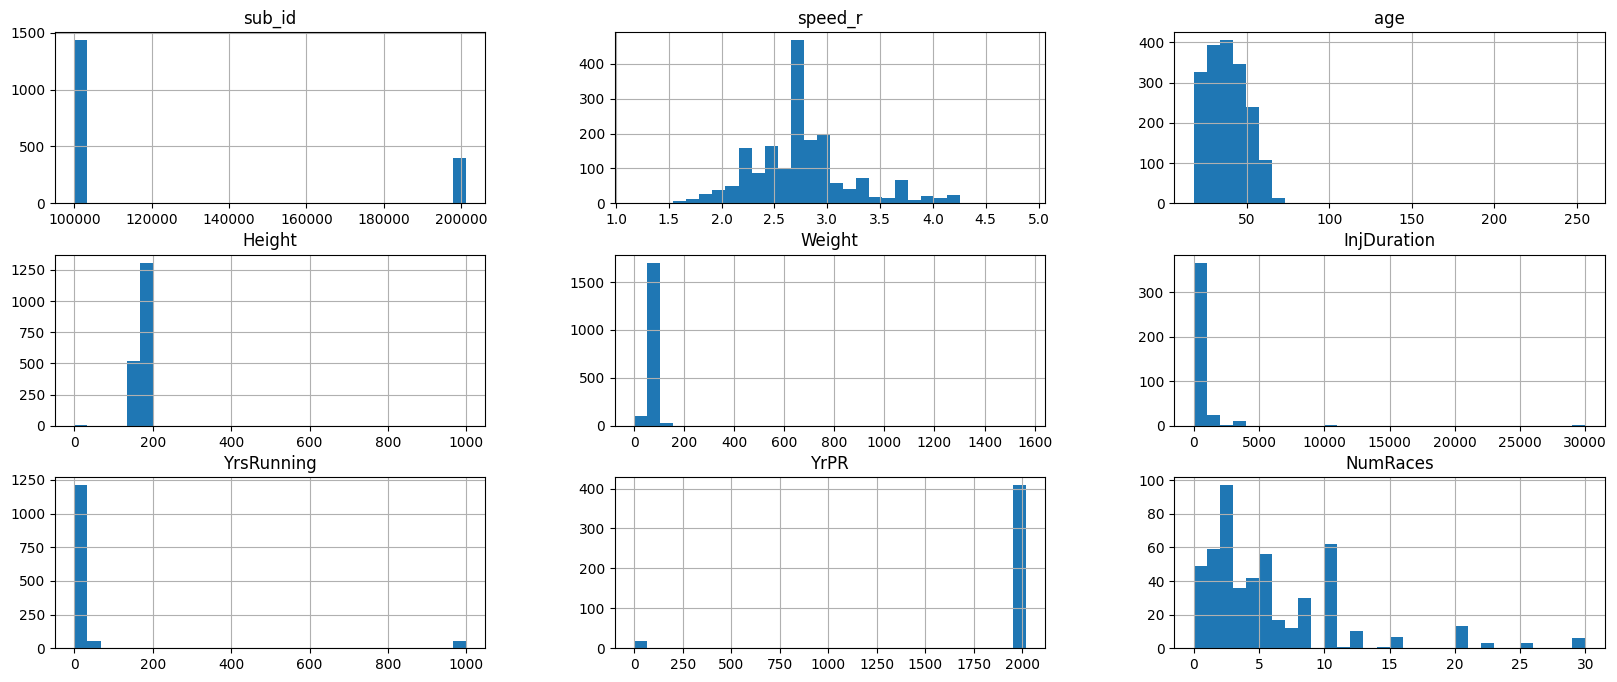

In [12]:
# Numeric variables:
run_data_meta.hist(bins=30, figsize=(20, 8))

There is some inconsistency on the values that needs to be fixed.
- YrPR has people reporting the last two digist of the year vs people reporting the full year:  19 vs 2019.
- YrsRunning has some unrealistc values close to 1k
- Height has values in meters and in centimeters like 1.82 vs 182 cm
- InjDuration has some values close to 10k and 30k that must be investigated.

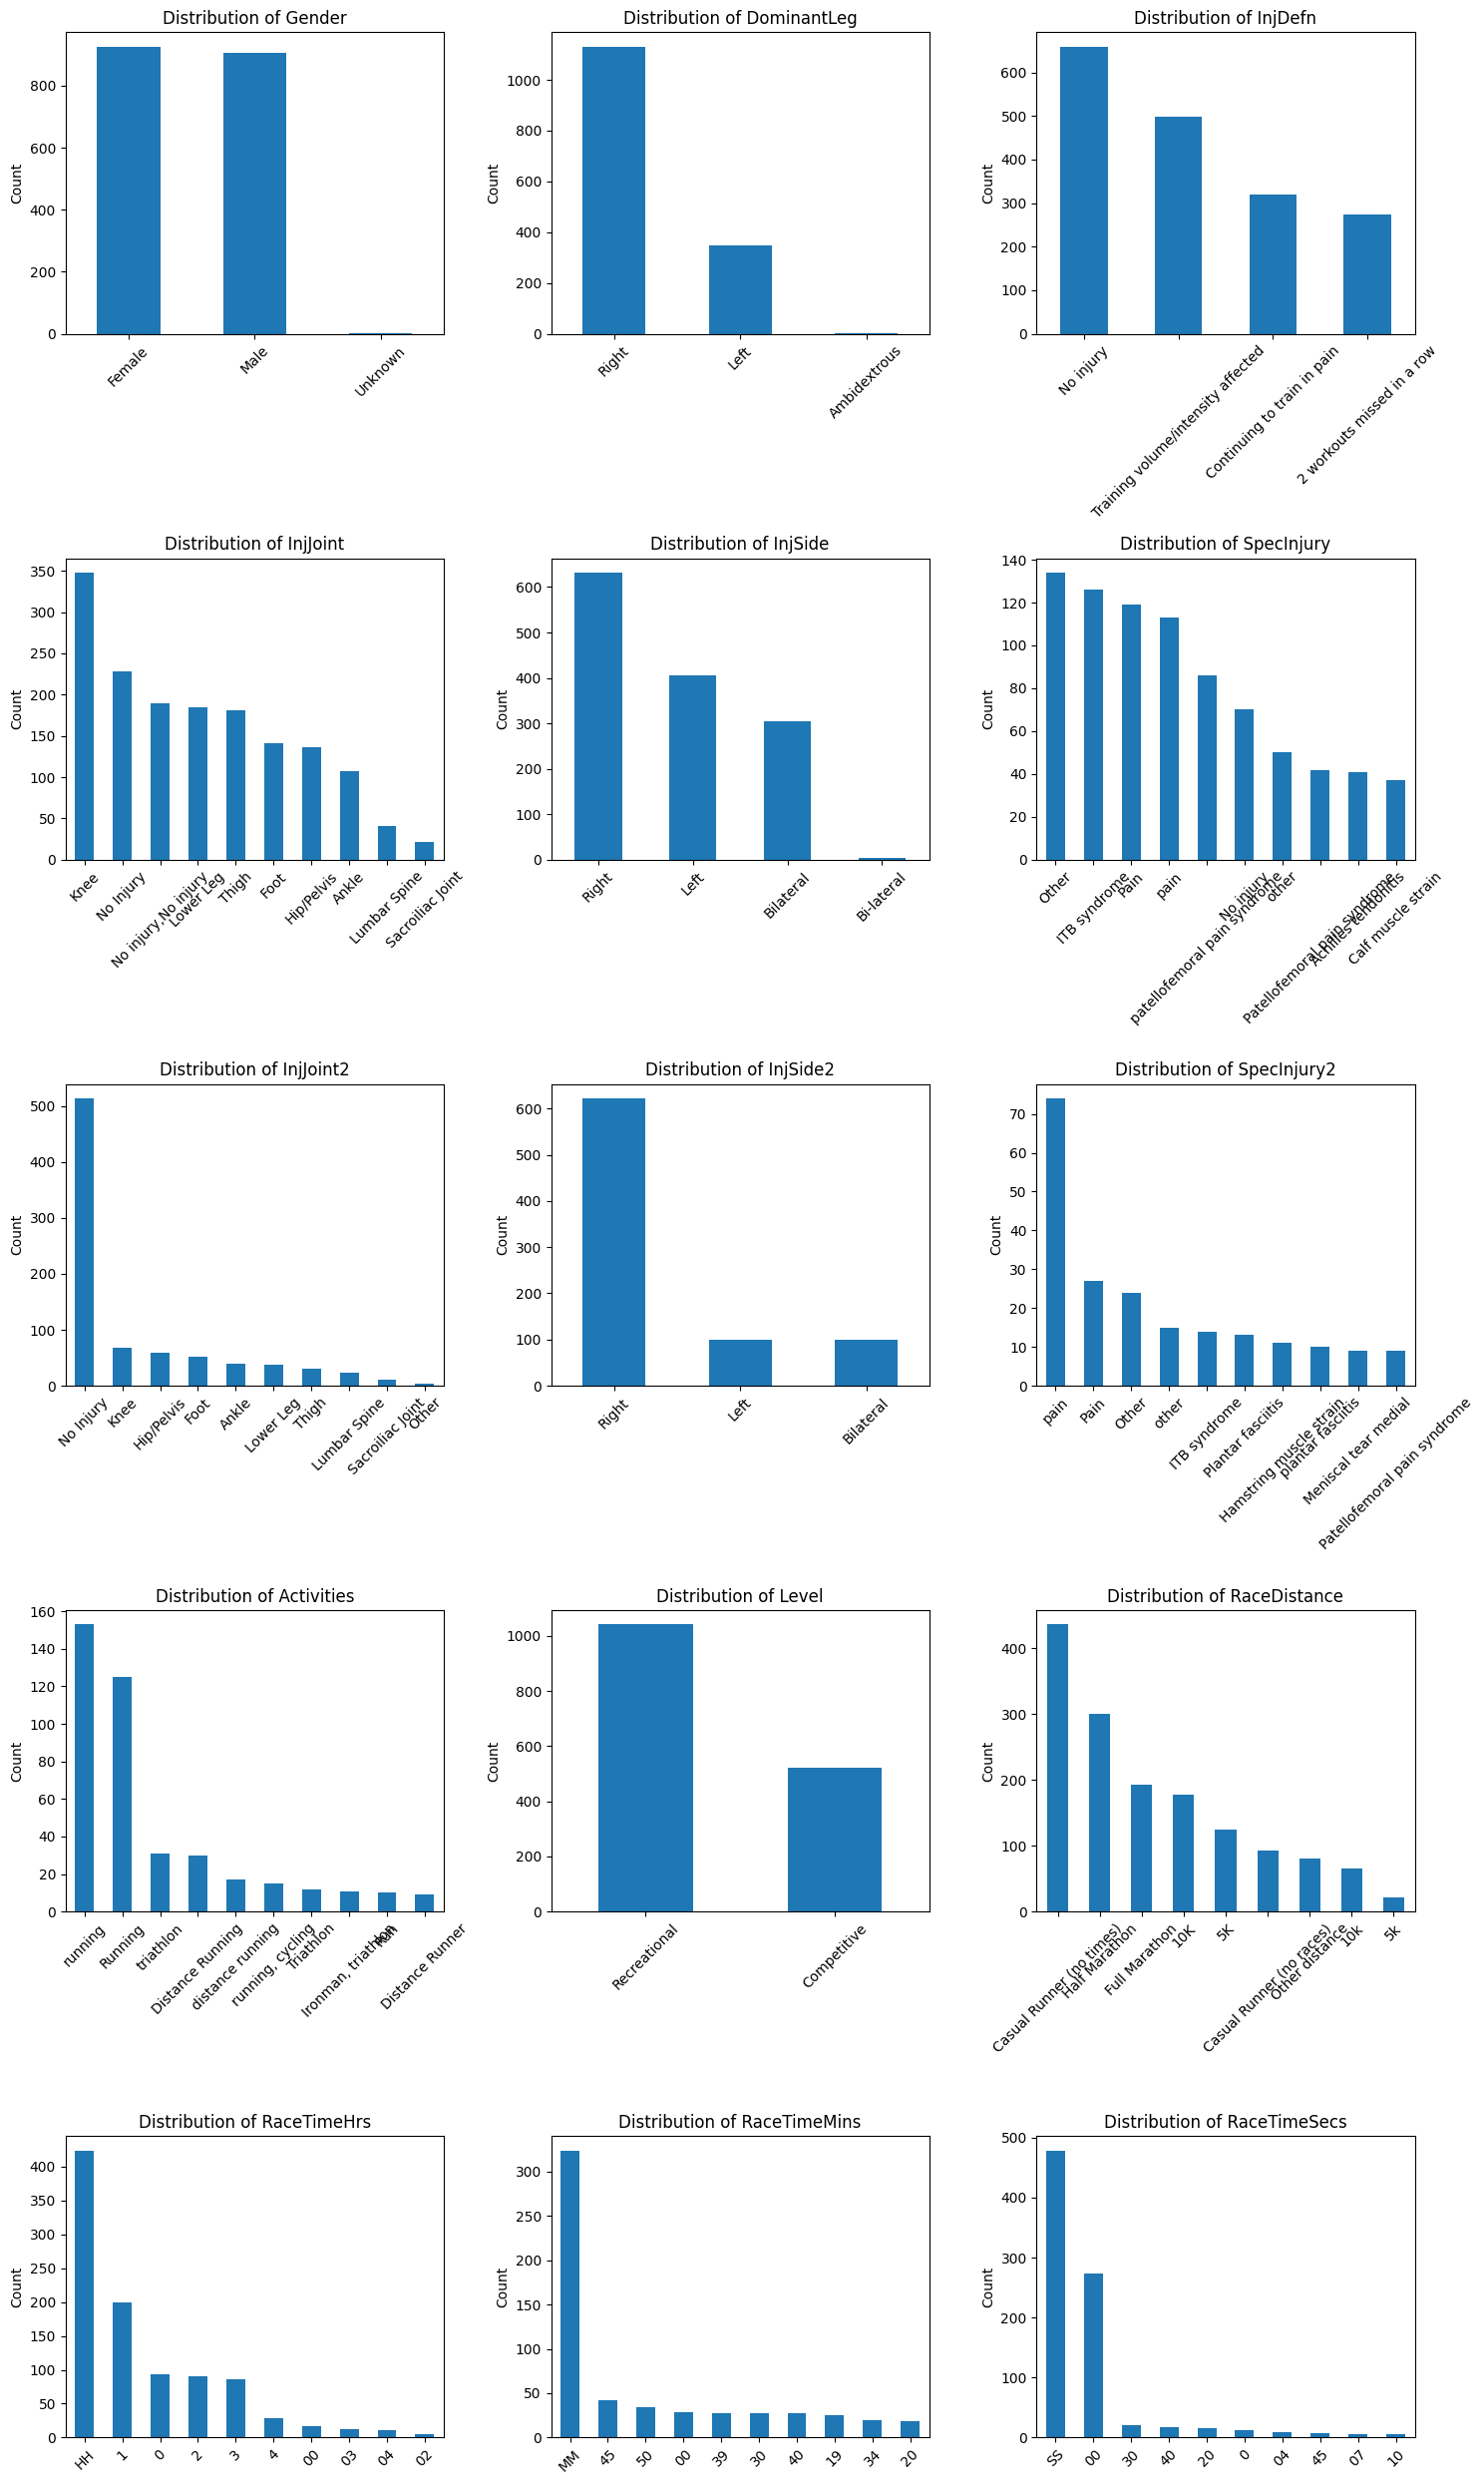

In [13]:
object_cols = run_data_meta.select_dtypes(include=['object']).columns
categorical_cols = [col for col in object_cols if col not in ['datestring', 'filename']]

MAX_COLS = 10

# Create subplots for each categorical column
n_cols = len(categorical_cols)
n_rows = (n_cols + 2) // 3  # 3 plots per row
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten()


for idx, col in enumerate(categorical_cols):
    value_counts = run_data_meta[col].value_counts()
    # Only show top MAX_COLS categories if there are too many
    if len(value_counts) > MAX_COLS:
        value_counts = value_counts.head(MAX_COLS)
    value_counts.plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Count')

# Remove empty subplots
for idx in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()



Main data quality issue with categorical variables is the inconsistency of values. Same values are represented in different ways. i.e. 0 and 00, running and Running, etc.
It would also make sense to merge `RaceTimeHrs`, `RaceTimeMins`, `RaceTimeSecs` into a single column.

In [14]:

sessions_per_subject = run_data_meta['sub_id'].value_counts().sort_values(ascending=False)
print("Number of subjects with more than 1 session:")
print(sessions_per_subject[sessions_per_subject > 1].count())

top_10_subjects_df = run_data_meta[run_data_meta['sub_id'].isin(sessions_per_subject.head(10).index)].sort_values('sub_id')
top_10_subjects_df

Number of subjects with more than 1 session:
209


,sub_id,datestring,filename,speed_r,age,Height,Weight,Gender,DominantLeg,InjDefn,...,SpecInjury2,Activities,Level,YrsRunning,RaceDistance,RaceTimeHrs,RaceTimeMins,RaceTimeSecs,YrPR,NumRaces
494,100712,2015-02-24 10:10:56,20150224T101056.json,3.363252,40,177.0,72.0,Male,NaN,No injury,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
923,100712,2013-04-03 10:22:57,20130403T102257.json,2.956986,38,177.1,69.8,Male,Right,No injury,...,NaN,running; ski; bike,Competitive,5.0,Full Marathon,2,34,NaN,NaN,2.0
498,100712,2015-02-24 12:16:35,20150224T121635.json,3.059634,40,177.0,72.0,Male,NaN,No injury,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,100712,2015-02-24 11:31:12,20150224T113112.json,3.978285,40,177.0,72.0,Male,NaN,No injury,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,100712,2015-02-24 10:58:10,20150224T105810.json,2.752303,40,177.0,72.0,Male,NaN,No injury,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,200337,2014-09-11 12:55:53,20140911T125553.json,2.950751,37,163.0,48.0,Female,Right,Continuing to train in pain,...,NaN,Running and gym,Competitive,5.0,Half Marathon,1,28,00,2012.0,5.0
1674,200337,2014-09-11 13:11:24,20140911T131124.json,3.715529,37,163.0,48.0,Female,Right,Continuing to train in pain,...,NaN,Running and gym,Competitive,5.0,Half Marathon,1,28,00,2012.0,5.0
1675,200337,2014-09-11 13:19:48,20140911T131948.json,2.925582,37,163.0,48.0,Female,Right,Continuing to train in pain,...,NaN,Running and gym,Competitive,5.0,Half Marathon,1,28,00,2012.0,5.0
1676,200337,2014-09-11 13:22:40,20140911T132240.json,3.707184,37,163.0,48.0,Female,Right,Continuing to train in pain,...,NaN,Running and gym,Competitive,5.0,Half Marathon,1,28,00,2012.0,5.0


There's 209 subjects that have 2 or more sessions.

After a quick inspection, we see that some of them only registered metadata for the first session.

We should also expect the data to change if the sessions happened over a a big period of time.

In [15]:
from core.data_quality import identify_conflicting_data
interesting_cols = ['sub_id', 'datestring', 'age', 'Gender', 'Height', 'Weight', 'DominantLeg', 'InjDefn', 'SpecInjury', 'SpecInjury2', 'Level', 'speed_r']
df = identify_conflicting_data(run_data_meta, ['sub_id'], ['age', 'Gender', 'Height', 'Weight', 'DominantLeg'])[interesting_cols]
df.head(50)

,sub_id,datestring,age,Gender,Height,Weight,DominantLeg,InjDefn,SpecInjury,SpecInjury2,Level,speed_r
663,100004,NaT,35,Male,175.6,59.0,Left,2 workouts missed in a row,calf muscle strain,NaN,Competitive,2.688014
1026,100004,2014-09-29 10:20:35,39,Male,175.0,61.0,Left,No injury,NaN,NaN,Competitive,2.928598
718,100058,2011-06-28 16:12:05,47,Male,177.0,73.6,Left,Training volume/intensity affected,pelvic dysfunction general,NaN,Recreational,2.681004
1364,100058,2012-05-26 09:54:28,48,Male,177.0,75.9,Right,No injury,NaN,NaN,Competitive,2.680958
625,100133,2010-05-04 16:32:37,26,Male,188.4,81.4,NaN,Training volume/intensity affected,pain,pain,Competitive,2.689915
1005,100133,2011-04-18 11:15:58,27,Male,190.2,78.7,NaN,No injury,ITB syndrome,NaN,Competitive,2.710375
1039,100198,2014-11-10 16:53:30,36,Male,175.0,74.0,Right,No injury,NaN,NaN,Competitive,3.075939
1004,100198,2011-02-18 14:00:24,33,Male,174.6,75.0,NaN,Continuing to train in pain,ITB syndrome,NaN,Competitive,2.688285
1355,100234,2012-05-18 09:44:09,43,Female,165.0,57.3,Right,No injury,NaN,NaN,Recreational,2.278154
1150,100234,2011-10-06 13:21:51,40,Female,165.3,56.4,Left,No injury,NaN,NaN,Competitive,2.504259


After a first glance we see the following situations:
- There are sessions for the same subject with different ages, in some cases with a gap of 10 years.
- There are sessions for the same subject where he reported to be competitive and later as just recreational.
- There are sessions for the same subject with different dominant leg.
- There are sessions for the same subject where the person reported different injury types, or injured not inured.



In [21]:
gender_conflicts = identify_conflicting_data(run_data_meta, ['sub_id'], ['Gender'])
gender_conflicts[interesting_cols].head(50)


,sub_id,datestring,age,Gender,Height,Weight,DominantLeg,InjDefn,SpecInjury,SpecInjury2,Level,speed_r
1491,200375,2014-05-01 14:27:37,51,Male,175.0,78.0,Right,No injury,First ray tendonitis (turf toe),NaN,Recreational,2.858582
1492,200375,2014-05-02 07:30:48,27,Female,168.0,51.0,Left,2 workouts missed in a row,Other,Pain,Recreational,2.923722
1493,200375,2014-05-02 07:41:59,27,Female,168.0,51.0,Left,2 workouts missed in a row,Other,Pain,Recreational,2.961155
1494,200375,2014-05-09 07:06:51,51,Male,175.0,78.0,Right,No injury,First ray tendonitis (turf toe),NaN,Recreational,2.859959


We must be careful when analysing data at subject level, there are different subjects that share the same ID. We should introduce a surrogate key.